# Introduction

This notebook leverages pre-defined functions from the `train_random_forest.py` script to train an random forest model on the Sentiment140 dataset using Bag of Words features.

### Setup    

In [6]:
import os
import sys
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
sys.path.append('../../src/models/')  # Add the path to the script

In [7]:
from train_random_forest import (
    load_bow_features, prepare_features_and_labels, 
    train_random_forest, evaluate_model, save_model
)

### Ensure the directory for figures exists

In [8]:
# Ensure the directory exists
output_dir = os.path.join('..', '..', 'reports', 'figures', 'models')
os.makedirs(output_dir, exist_ok=True)

### Load the cleaned data

In [9]:
import pandas as pd

def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

# Use the load_data function to load your data
df = load_data('../../data/processed/cleaned_data.csv')
df = df.dropna(subset=['clean_text'])

### Feature Engineering: Load BoW Features

In [10]:
bow_df, vectorizer = load_bow_features('../../src/features/Bow.pkl', '../../models/Bow_model.pkl')

c:\Users\efelix\AppData\Local\anaconda3\envs\environment\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Prepare Features and Labels

In [11]:
# Prepare the features (X) and labels (y) for training
X, y = prepare_features_and_labels(bow_df)

### Train the Random Forest Model

In [12]:
# Train the Random Forest model using the prepared features and labels
model = train_random_forest(X, y, n_estimators=75, max_depth=30, max_features='sqrt', max_samples=0.9)

### Evaluate the Model

In [13]:
accuracy, report = evaluate_model(model, X, y)
print(f"Model Accuracy on Full Dataset: {round(accuracy)}")
print("\nClassification Report:\n", report)

Model Accuracy on Full Dataset: 1

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.57      0.67    796302
           1       0.67      0.85      0.75    795668

    accuracy                           0.71   1591970
   macro avg       0.73      0.71      0.71   1591970
weighted avg       0.73      0.71      0.71   1591970



In [14]:
y_pred = model.predict(X)

### Visualization: Confusion Matrix

Saving the plot to ..\..\reports\figures\models\rand_frst_conf_mtx.png


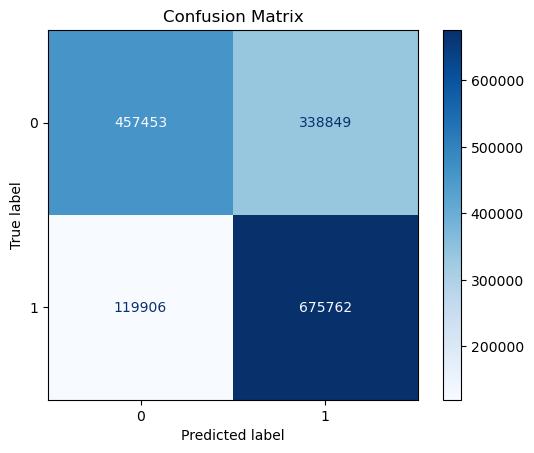

In [15]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
disp.ax_.set_title('Confusion Matrix')
save_path = os.path.join(output_dir, 'rand_frst_conf_mtx.png')
print(f"Saving the plot to {save_path}")
plt.savefig(save_path)
plt.show()

### Save the Model

In [16]:
model_path = '../../models/random_forest_model.pkl'

# Check if the file already exists
if os.path.exists(model_path):
    print(f"File {model_path} already exists. The model will not be overwritten.")
else:
    save_model(model, model_path)
    print(f"Model saved to {model_path}")

# Code to overwrite the model if needed (Uncomment the following lines to overwrite)
save_model(model, model_path)
print(f"Model overwritten at {model_path}")

File ../../models/random_forest_model.pkl already exists. The model will not be overwritten.
Model overwritten at ../../models/random_forest_model.pkl
